In [0]:
import numpy as np
from numpy import load
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd


In [2]:

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization

Using TensorFlow backend.


In [3]:
#unpack data from source

data = np.load('./drive/My Drive/Colab Notebooks/data/csci4622_kaggle3/train_and_test.npz')  #what kind of file is this? zipped np.array file
type(data)

X = [data[key] for key in data]  #??? why does this work? "data" is not a dictionary data type but a NpzFile type

print('len of X = ', len(X))  #there are three separate np arrays in the list: 1) train data 2) train labels 3) test data, no labels
print(type(X[0]))

xtrain0 = X[0]
ytrain0 = X[1]  #ytrain0 contains values between 0-42; so 43 categories
xtest0 = X[2]   #this is test data for final kaggle submission; it still needs to be normalized

print(xtrain0.shape)
print(ytrain0.shape)
print(xtest0.shape)

len of X =  3
<class 'numpy.ndarray'>
(39209, 32, 32, 3)
(39209,)
(12630, 32, 32, 3)


In [4]:
np.max(ytrain0)

42

In [5]:
#preprocess data - normalize input; divide all data by max pixel value, 255 ; we might also consider z normalization

#hot encode the labels
ymax = np.max(ytrain0)
ytrain = tf.keras.utils.to_categorical(ytrain0, ymax+1)

maxpixel_val = np.max(xtrain0) 
xtrain = xtrain0/maxpixel_val
xtest = xtest0/maxpixel_val  

x_tr, x_tst, y_tr, y_tst = train_test_split(xtrain, ytrain, test_size = 0.05,shuffle = True)  #results overfit if data is not shuffled!!!
print(x_tr.shape)
print(y_tr.shape)
print(x_tst.shape)
print(y_tst.shape)



(37248, 32, 32, 3)
(37248, 43)
(1961, 32, 32, 3)
(1961, 43)


In [6]:
print(ytrain0[0])  #before and after hot encoding
print(ytrain[0])

0
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [0]:
#build model
def build_model(activation, batch_normalization = False):
    model = Sequential()
    model.add(Conv2D(8, (3,3), activation = activation, padding = 'same', name = 'conv1', 
                    input_shape = (32,32,3))) 
    if batch_normalization: 
        model.add(BatchNormalization())
    #model.add(MaxPooling2D((2,2), name = 'maxpool1')) 
    #model.add(Conv2D(16, (3,3), activation = activation, padding = 'same', name = 'conv2' ))
    #if batch_normalization: 
    #    model.add(BatchNormalization())
    model.add(MaxPooling2D((2,2), name = 'maxpool2'))
    model.add(Conv2D(32, (3,3), activation = 'relu', padding = 'same', name = 'conv3'))
    if batch_normalization: 
        model.add(BatchNormalization())
    #model.add(MaxPooling2D((2,2), name = 'maxpool3'))
    #model.add(Conv2D(32, (3, 3), activation=activation, padding='same', name='conv_4'))
    #if batch_normalization: 
    #    model.add(BatchNormalization())
    
    model.add(MaxPooling2D((2, 2), name='maxpool_4'))
    model.add(Flatten())
    #model.add(Dropout(0.2))
    model.add(Dense(64, activation=activation, name='dense_1'))
    if batch_normalization: 
        model.add(BatchNormalization())
    #model.add(Dense(32, activation=activation, name='dense_2'))
    model.add(Dense(43, activation='softmax', name='output'))  #there are 43 labels
    return model

In [35]:
#increment learning rate with sigmoid function
model = build_model(activation = 'sigmoid', batch_normalization = True)
learn = [0.001, 0.01, 0.10, 0.50, 1, 5]
res_sig =[]

for i in learn:
    opt = tf.keras.optimizers.SGD(learning_rate = i, momentum = 0.0, nesterov=False)
    model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])
    model.fit(x_tr, y_tr, epochs = 30, validation_data= (x_tst, y_tst))
    loss, accuracy = model.evaluate(x_tst, y_tst)
    res_sig.append(accuracy)

#model.summary()

Train on 37248 samples, validate on 1961 samples
Epoch 1/30
37248/37248 [==============================] - 7s 197us/step - loss: 2.7844 - accuracy: 0.3098 - val_loss: 2.0293 - val_accuracy: 0.5074
Epoch 2/30
37248/37248 [==============================] - 7s 184us/step - loss: 1.7746 - accuracy: 0.5684 - val_loss: 1.4320 - val_accuracy: 0.6629
Epoch 3/30
37248/37248 [==============================] - 7s 176us/step - loss: 1.3372 - accuracy: 0.6886 - val_loss: 1.1041 - val_accuracy: 0.7542
Epoch 4/30
37248/37248 [==============================] - 7s 196us/step - loss: 1.0635 - accuracy: 0.7644 - val_loss: 0.9095 - val_accuracy: 0.8006
Epoch 5/30
37248/37248 [==============================] - 7s 188us/step - loss: 0.8781 - accuracy: 0.8134 - val_loss: 0.7624 - val_accuracy: 0.8327
Epoch 6/30
37248/37248 [==============================] - 7s 185us/step - loss: 0.7422 - accuracy: 0.8484 - val_loss: 0.6562 - val_accuracy: 0.8623
Epoch 7/30
37248/37248 [==============================] - 7s 18

In [36]:
#increment learning rate with relu
model = build_model(activation = 'relu', batch_normalization = True)
learn = [0.001, 0.01, 0.10, 0.50, 1, 5]
res_relu =[]

for i in learn:
    opt = tf.keras.optimizers.SGD(learning_rate = i, momentum = 0.0, nesterov=False)
    model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])
    model.fit(x_tr, y_tr, epochs = 30, validation_data= (x_tst, y_tst))
    loss, accuracy = model.evaluate(x_tst, y_tst)
    res_relu.append(accuracy)

#model.summary()

Train on 37248 samples, validate on 1961 samples
Epoch 1/30
37248/37248 [==============================] - 7s 197us/step - loss: 2.8671 - accuracy: 0.2865 - val_loss: 2.1547 - val_accuracy: 0.4916
Epoch 2/30
37248/37248 [==============================] - 7s 194us/step - loss: 1.8968 - accuracy: 0.5402 - val_loss: 1.5885 - val_accuracy: 0.6242
Epoch 3/30
37248/37248 [==============================] - 7s 191us/step - loss: 1.4717 - accuracy: 0.6536 - val_loss: 1.2575 - val_accuracy: 0.6986
Epoch 4/30
37248/37248 [==============================] - 7s 184us/step - loss: 1.1907 - accuracy: 0.7335 - val_loss: 1.0420 - val_accuracy: 0.7649
Epoch 5/30
37248/37248 [==============================] - 7s 185us/step - loss: 0.9934 - accuracy: 0.7873 - val_loss: 0.8727 - val_accuracy: 0.8062
Epoch 6/30
37248/37248 [==============================] - 7s 191us/step - loss: 0.8433 - accuracy: 0.8257 - val_loss: 0.7488 - val_accuracy: 0.8465
Epoch 7/30
37248/37248 [==============================] - 7s 19

learn rate:  [0.001, 0.01, 0.1, 0.5, 1, 5]
relu:  [0.976542592048645, 0.9913309812545776, 0.9903110861778259, 0.9857215881347656, 0.9862315058708191, 0.008159102872014046]
sigmoid:  [0.9770525097846985, 0.9954105019569397, 0.9938806891441345, 0.9745028018951416, 0.3844977021217346, 0.008159102872014046]


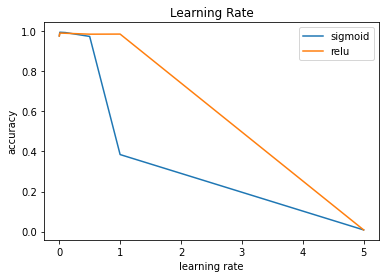

In [37]:
#plot learning rates vs accuracy
#res_sig = np.array(res)
plt.plot(learn, res_sig, label='sigmoid')
plt.plot(learn, res_relu, label='relu')
plt.xlabel('learning rate')
plt.ylabel('accuracy')
plt.legend()
plt.title('Learning Rate')
print('learn rate: ', learn)
print('relu: ',res_relu)
print('sigmoid: ', res_sig)

In [34]:
#run final model for submission
model = build_model(activation = 'relu', batch_normalization = True)
opt = tf.keras.optimizers.SGD(learning_rate = 0.01, momentum = 0.5, nesterov=True)
model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])
model.fit(x_tr, y_tr, epochs = 30, validation_data= (x_tst, y_tst))


Train on 37248 samples, validate on 1961 samples
Epoch 1/30
37248/37248 [==============================] - 7s 197us/step - loss: 0.9269 - accuracy: 0.7779 - val_loss: 0.2489 - val_accuracy: 0.9434
Epoch 2/30
37248/37248 [==============================] - 7s 182us/step - loss: 0.1881 - accuracy: 0.9640 - val_loss: 0.1438 - val_accuracy: 0.9694
Epoch 3/30
37248/37248 [==============================] - 7s 178us/step - loss: 0.0944 - accuracy: 0.9837 - val_loss: 0.1295 - val_accuracy: 0.9648
Epoch 4/30
37248/37248 [==============================] - 7s 182us/step - loss: 0.0563 - accuracy: 0.9922 - val_loss: 0.0762 - val_accuracy: 0.9796
Epoch 5/30
37248/37248 [==============================] - 7s 191us/step - loss: 0.0400 - accuracy: 0.9950 - val_loss: 0.0569 - val_accuracy: 0.9867
Epoch 6/30
37248/37248 [==============================] - 7s 195us/step - loss: 0.0289 - accuracy: 0.9966 - val_loss: 0.0571 - val_accuracy: 0.9862
Epoch 7/30
37248/37248 [==============================] - 7s 18

In [12]:
loss, accuracy = model.evaluate(x_tst, y_tst)
print('Test accuracy: %.4f' % (accuracy))

1961/1961 [==============================] - 0s 95us/step
Test accuracy: 0.9939


##below is to create the kaggle submission file

In [0]:
yhat_hot = model.predict_classes(xtest)


In [14]:
yhat_hot.shape

(12630,)

In [15]:
yhat_hot[0:5]

array([16,  1, 38, 33, 11])

In [16]:
label_list = []
for i in range(len(set(ytrain0))):
    a = 'oh_' + str(i)
    label_list.append(a)

label_list[-1]    

'oh_42'

In [17]:
rows = len(yhat_hot)
columns = len(set(ytrain0))
res_array = np.zeros((rows, columns), dtype=int)
res_array.shape

(12630, 43)

In [0]:
df_hot = pd.DataFrame(res_array, columns = label_list)
i = 0
for lb in yhat_hot:
    df_hot.iloc[i][lb] = 1
    i += 1

In [0]:

df_hot.insert(0,'id', np.arange(len(xtest)))


In [20]:
df_hot.head()

,id,oh_0,oh_1,oh_2,oh_3,oh_4,oh_5,oh_6,oh_7,oh_8,oh_9,oh_10,oh_11,oh_12,oh_13,oh_14,oh_15,oh_16,oh_17,oh_18,oh_19,oh_20,oh_21,oh_22,oh_23,oh_24,oh_25,oh_26,oh_27,oh_28,oh_29,oh_30,oh_31,oh_32,oh_33,oh_34,oh_35,oh_36,oh_37,oh_38,oh_39,oh_40,oh_41,oh_42
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
df_hot.to_csv('./drive/My Drive/Colab Notebooks/data/csci4622_kaggle3/final_hot.csv', index=False)

##below is to error check and visualization

In [22]:
yhat = model.predict(x_tst, verbose = True)

1961/1961 [==============================] - 0s 91us/step


In [0]:
y_TST = [np.argmax(y_tst[i]) for i in range(len(y_tst))]

In [24]:
y_TST[0:5]

[15, 2, 3, 38, 4]

In [25]:
y_tst[0:5]  #y_TST and y_tst both check 

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
y_HAT = [np.argmax(yhat[i]) for i in range(len(yhat))]

In [27]:
y_HAT[0:5]

[15, 2, 3, 38, 4]

(array([ 16., 108., 105.,  69.,  98.,  95.,  19.,  75.,  65.,  68., 100.,
         63., 112., 122.,  43.,  27.,  21.,  70.,  60.,  11.,  14.,  21.,
         10.,  24.,  11.,  72.,  23.,  10.,  19.,  11.,  31.,  27.,   5.,
         32.,  31.,  57.,  16.,   8., 114.,  24.,  19.,  17.,  18.]),
 array([ 0.        ,  0.97674419,  1.95348837,  2.93023256,  3.90697674,
         4.88372093,  5.86046512,  6.8372093 ,  7.81395349,  8.79069767,
         9.76744186, 10.74418605, 11.72093023, 12.69767442, 13.6744186 ,
        14.65116279, 15.62790698, 16.60465116, 17.58139535, 18.55813953,
        19.53488372, 20.51162791, 21.48837209, 22.46511628, 23.44186047,
        24.41860465, 25.39534884, 26.37209302, 27.34883721, 28.3255814 ,
        29.30232558, 30.27906977, 31.25581395, 32.23255814, 33.20930233,
        34.18604651, 35.1627907 , 36.13953488, 37.11627907, 38.09302326,
        39.06976744, 40.04651163, 41.02325581, 42.        ]),
 <a list of 43 Patch objects>)

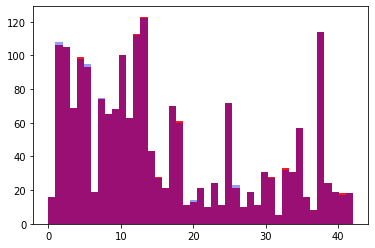

In [28]:

plt.hist(y_HAT, color = 'r', alpha = 0.9, bins = 43)
plt.hist(y_TST, color='b', alpha = 0.4, bins = 43)

missclassification can be seen in the non overlapping areas


###code below not used - it is to see probabilities from the softmax

In [29]:
yhat_final = model.predict(xtest, verbose = True)
y_HAT_final = [np.argmax(yhat_final[i]) for i in range(len(yhat_final))]
y_HAT_finalP = [np.max(yhat_final[i]) for i in range(len(yhat_final))]

12630/12630 [==============================] - 1s 85us/step


In [30]:
yhat_final[0:2]

array([[4.88063336e-07, 1.00801534e-09, 6.77827499e-12, 5.79216730e-10,
        5.89931792e-09, 1.97034879e-05, 5.83450728e-08, 4.74472927e-06,
        6.25310804e-07, 8.04740921e-07, 1.15388701e-07, 2.89267348e-08,
        2.01572026e-09, 9.41273587e-11, 7.30854310e-08, 1.86511409e-06,
        9.99969482e-01, 1.70704375e-08, 4.91471326e-08, 1.90370372e-10,
        1.78169639e-08, 1.49387887e-07, 4.13809232e-07, 1.07968155e-07,
        8.99692487e-10, 6.79985457e-10, 4.17013002e-09, 1.51781933e-07,
        4.15909867e-08, 2.38604400e-07, 1.05315454e-08, 7.38812460e-08,
        2.51790517e-08, 4.91287366e-09, 1.61741065e-09, 5.34045741e-09,
        8.14438916e-09, 1.98756034e-09, 2.30225750e-09, 8.90123752e-10,
        2.94837804e-07, 4.14179965e-07, 3.45475506e-08],
       [3.13379864e-08, 1.00000000e+00, 1.43865908e-09, 5.86136565e-12,
        3.35849890e-08, 6.23317975e-09, 1.60993163e-09, 2.44177559e-14,
        1.33954675e-12, 3.67512095e-15, 1.10965089e-12, 1.73174328e-13,
       

In [31]:
y_HAT_final[0:5]  #predicted labels

[16, 1, 38, 33, 11]

In [32]:
y_HAT_finalP[0:5]  #predicted probabilities

[0.9999695, 1.0, 0.9999999, 0.99967444, 0.99999976]